# Wafer Fault Prediction

## Import Required Libraries

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the feature store dataset as dataframe

file_path = r"wafer_23012020_041211.csv"
wafers = pd.read_csv(file_path)
print(f"Shape of the feature store dataset: {wafers.shape}")
wafers.head()

Shape of the feature store dataset: (100, 592)


,Unnamed: 0,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
0,Wafer-801,2968.33,2476.58,2216.7333,1748.0885,1.1127,100.0,97.5822,0.1242,1.5300,...,NaN,0.5004,0.0120,0.0033,2.4069,0.0545,0.0184,0.0055,33.7876,-1
1,Wafer-802,2961.04,2506.43,2170.0666,1364.5157,1.5447,100.0,96.7700,0.1230,1.3953,...,NaN,0.4994,0.0115,0.0031,2.3020,0.0545,0.0184,0.0055,33.7876,1
2,Wafer-803,3072.03,2500.68,2205.7445,1363.1048,1.0518,100.0,101.8644,0.1220,1.3896,...,NaN,0.4987,0.0118,0.0036,2.3719,0.0545,0.0184,0.0055,33.7876,-1
3,Wafer-804,3021.83,2419.83,2205.7445,1363.1048,1.0518,100.0,101.8644,0.1220,1.4108,...,NaN,0.4934,0.0123,0.0040,2.4923,0.0545,0.0184,0.0055,33.7876,-1
4,Wafer-805,3006.95,2435.34,2189.8111,1084.6502,1.1993,100.0,104.8856,0.1234,1.5094,...,NaN,0.4987,0.0145,0.0041,2.8991,0.0545,0.0184,0.0055,33.7876,-1


In [3]:
# Train-Test Split

from sklearn.model_selection import train_test_split

wafers, wafers_test = train_test_split(wafers, test_size=0.20, random_state=42)

In [4]:
# Wafer's info

wafers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80 entries, 55 to 51
Columns: 592 entries, Unnamed: 0 to Good/Bad
dtypes: float64(494), int64(97), object(1)
memory usage: 370.6+ KB


In [5]:
wafers

,Unnamed: 0,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
55,Wafer-856,NaN,2532.45,2191.1333,2197.6570,1.1569,100.0,89.7222,0.1251,1.5762,...,NaN,0.4936,0.0113,0.0033,2.2874,0.0133,0.0139,0.0038,104.3034,-1
88,Wafer-889,3221.21,2391.20,2189.9667,1046.6212,0.8662,100.0,102.3622,0.1208,1.4756,...,NaN,0.4940,0.0123,0.0033,2.4860,0.0280,0.0078,0.0022,27.7601,-1
26,Wafer-827,2951.85,2525.00,2189.5777,1320.3197,1.3459,100.0,100.7744,0.1234,1.5590,...,53.8577,0.5025,0.0178,0.0045,3.5361,0.0286,0.0154,0.0056,53.8577,-1
42,Wafer-843,2982.07,2447.06,2199.6334,1242.8420,1.4083,100.0,99.2178,0.1221,1.4542,...,NaN,0.4993,0.0151,0.0038,3.0214,0.0117,0.0262,0.0089,223.1018,-1
69,Wafer-870,3058.08,2524.60,2192.3778,1110.5453,0.8147,100.0,99.2922,0.1226,1.4958,...,24.6547,0.4974,0.0171,0.0040,3.4352,0.0218,0.0054,0.0020,24.6547,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,Wafer-861,3071.05,2642.15,2200.9889,1054.5240,1.3830,100.0,100.1800,0.1201,1.4532,...,NaN,0.4973,0.0139,0.0039,2.7851,0.0122,0.0131,0.0039,107.5257,-1
71,Wafer-872,3043.18,2545.53,2192.3778,1110.5453,0.8147,100.0,99.2922,0.1226,1.3824,...,NaN,0.4989,0.0131,0.0036,2.6253,0.0218,0.0054,0.0020,24.6547,-1
14,Wafer-815,3001.26,2519.92,2224.6778,1308.6479,1.3907,100.0,101.1333,0.1208,1.5172,...,48.4818,0.4959,0.0142,0.0037,2.8609,0.0278,0.0135,0.0042,48.4818,-1
92,Wafer-893,3007.00,2572.62,2213.2111,2070.7147,1.9705,100.0,87.7411,0.1232,1.4446,...,NaN,0.4987,0.0172,0.0041,3.4417,0.0195,0.0149,0.0047,76.0035,-1


In [6]:
wafers.describe()

,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,Sensor-10,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
count,79.000000,80.000000,78.000000,78.000000,78.000000,78.0,78.000000,78.000000,80.000000,80.000000,...,27.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000
mean,3019.048228,2494.058875,2202.758988,1519.467071,1.201382,100.0,96.881160,0.122158,1.460087,0.000946,...,63.785093,0.499493,0.013905,0.003591,2.785103,0.023543,0.014155,0.004439,72.116730,-0.850000
std,72.665372,68.166898,31.633772,471.962104,0.365870,0.0,5.520108,0.002062,0.072159,0.010865,...,30.722790,0.003683,0.004577,0.000908,0.923064,0.011668,0.007263,0.002324,50.770394,0.530106
min,2889.670000,2254.990000,2114.666700,978.783200,0.753100,100.0,83.423300,0.116000,1.317900,-0.026500,...,20.309100,0.492500,0.007600,0.002100,1.515200,0.009900,0.004800,0.001700,20.309100,-1.000000
25%,2975.425000,2452.517500,2189.966700,1111.543600,0.850075,100.0,93.547250,0.120800,1.409950,-0.005750,...,46.961400,0.497175,0.011500,0.003100,2.298350,0.013850,0.009000,0.002650,33.654025,-1.000000
50%,3004.390000,2502.445000,2200.955600,1308.647900,1.164250,100.0,99.217800,0.122150,1.451900,0.001500,...,54.476100,0.499450,0.012950,0.003400,2.577150,0.021800,0.013100,0.003800,59.082500,-1.000000
75%,3065.730000,2532.755000,2212.866700,1997.641600,1.383000,100.0,101.133300,0.123375,1.498675,0.009000,...,80.740300,0.501700,0.014950,0.003925,2.992300,0.028100,0.018400,0.005750,93.190025,-1.000000
max,3221.210000,2664.520000,2315.266700,2363.641200,2.207300,100.0,103.091100,0.126200,1.641100,0.025000,...,151.193000,0.508700,0.043700,0.008900,8.816000,0.054500,0.033400,0.012000,223.101800,1.000000


## Insight

From the gist of only shown columns, it looks like some of features have pretty bad outliers. One this is for sure, the data must be standardized.

In [7]:
wafers['Good/Bad'].value_counts()

Good/Bad
-1    74
 1     6
Name: count, dtype: int64

Insight: Data is imabalanced. Hence, definitely gonna need resampling

### Analyze missing data

In [8]:
# check missing values in target column

print(wafers['Good/Bad'].isnull().sum())

0


No missing values found in the target column

In [9]:
# checking missing values in independent column

print(wafers.isna().sum().sum() / (wafers.shape[0] * wafers.shape[1] - 1))

0.03847209611689436


Almost 4% out of total cells we're having, are missing
We're gonna try all sort of imputation strategies and would choose the one with that's gonna give us least overall-error-value.

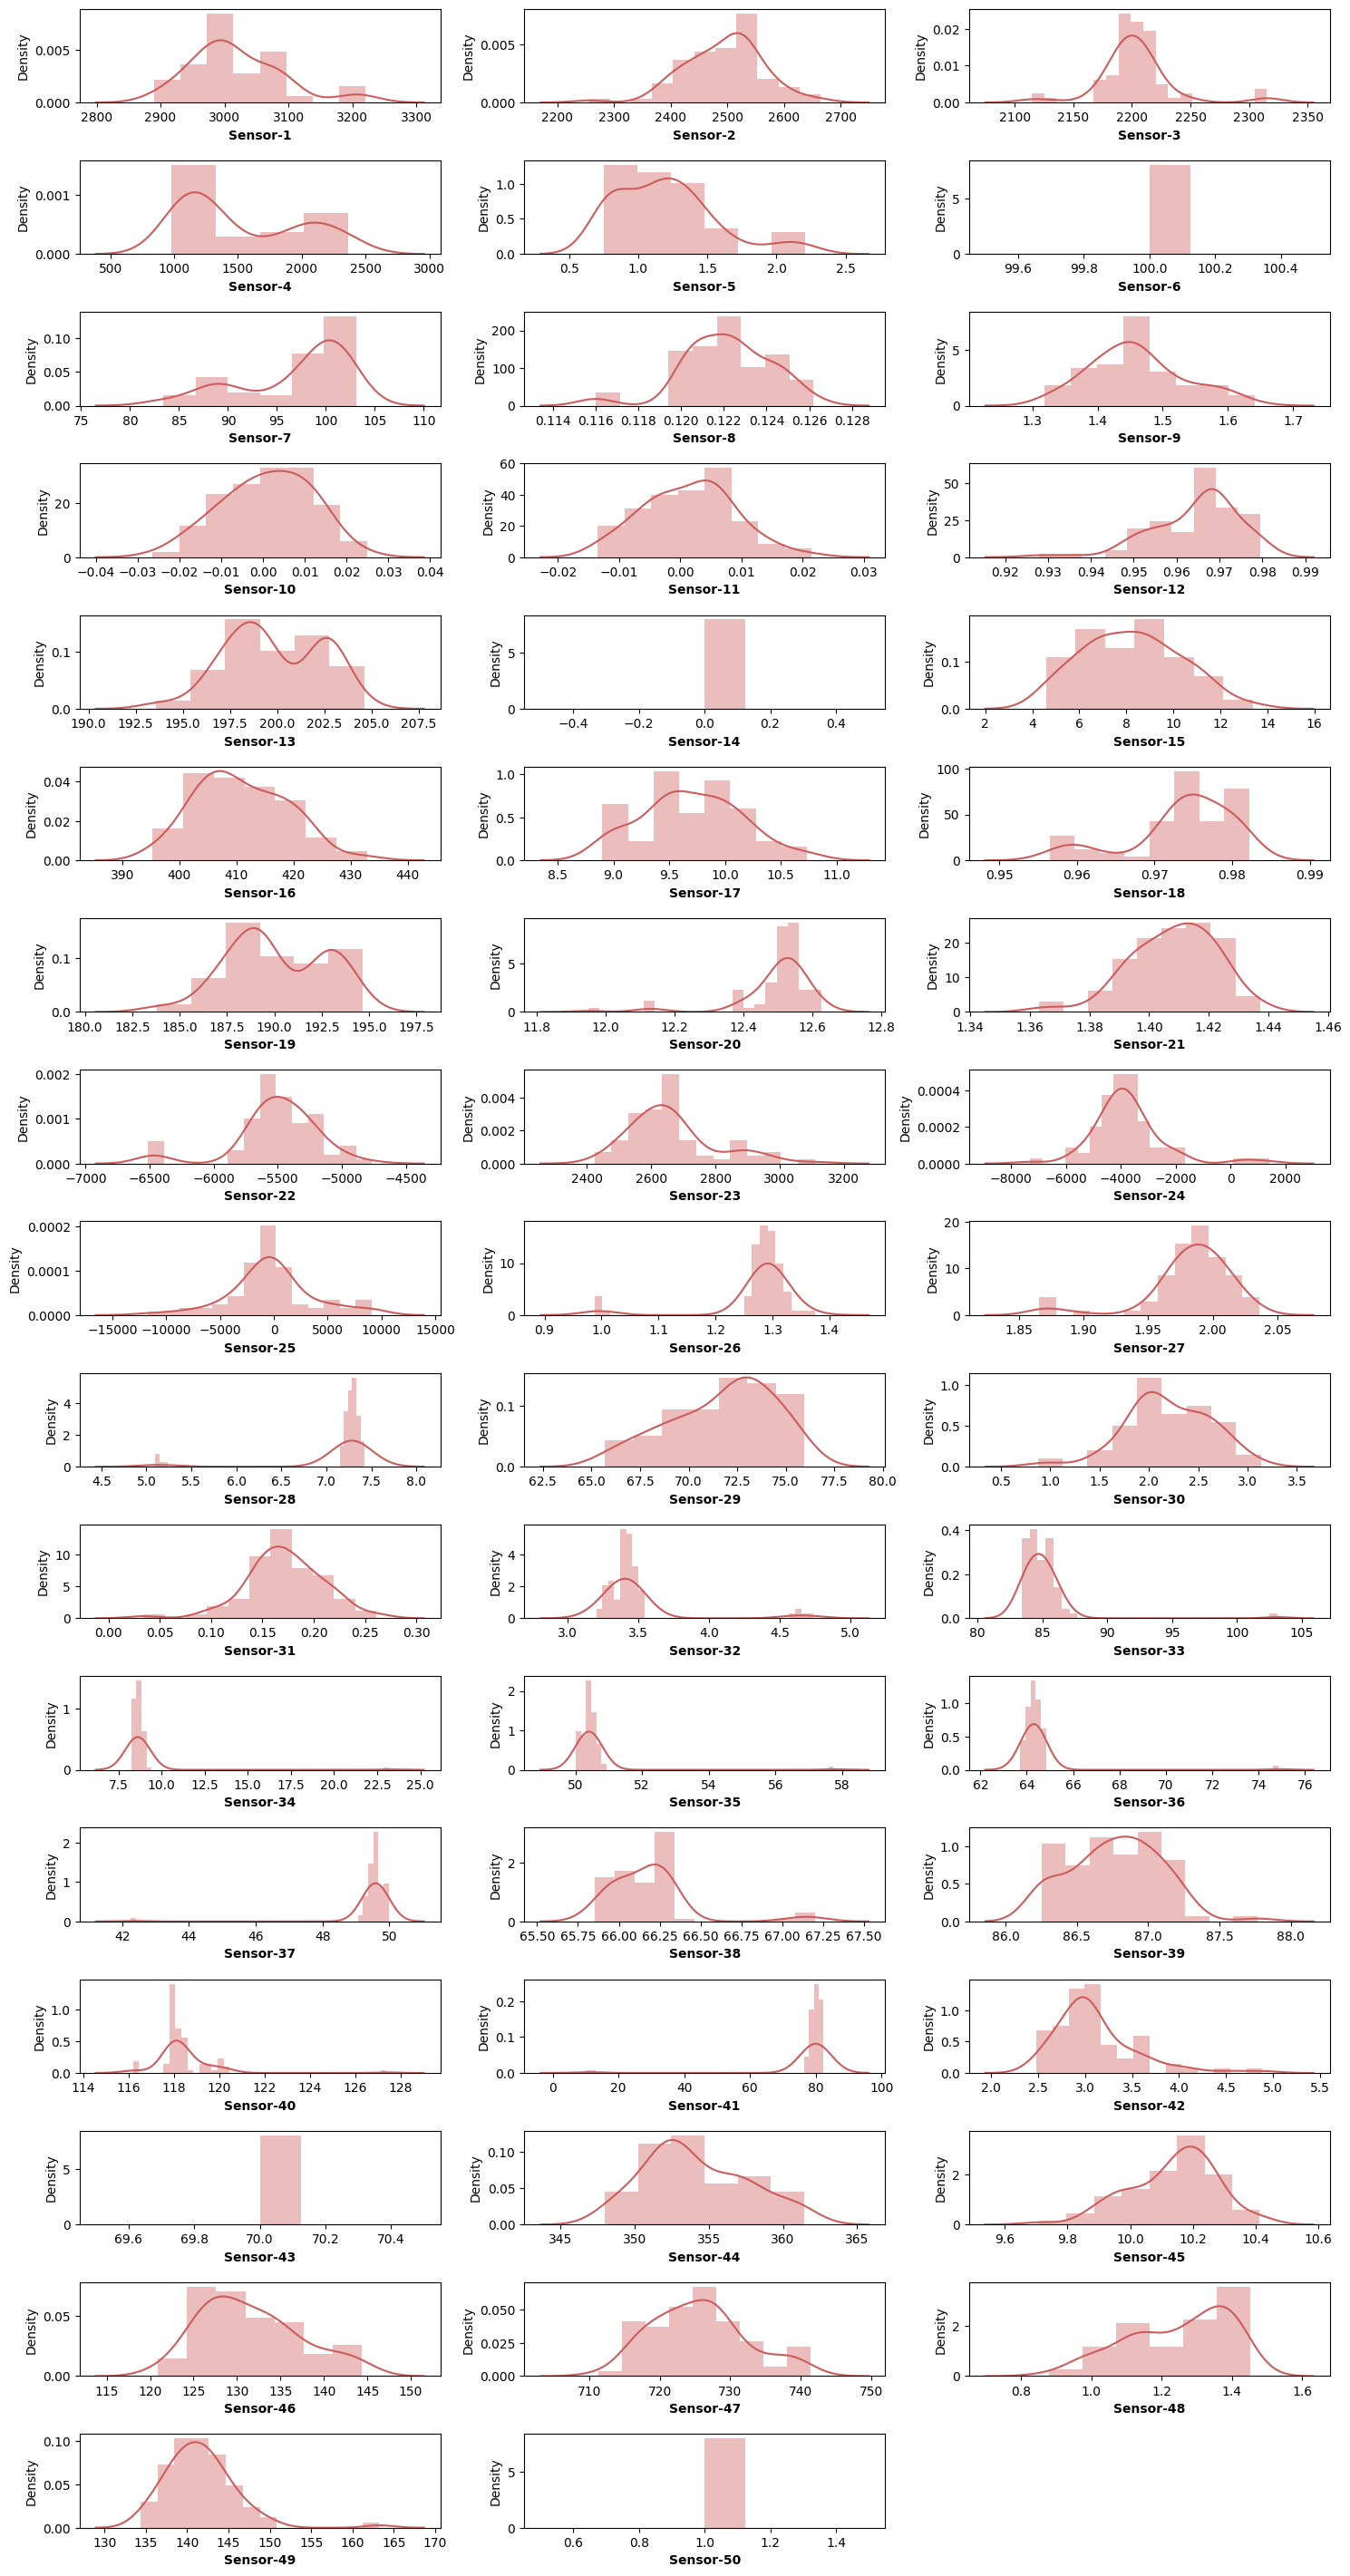

In [10]:
plt.figure(figsize=(15, 100))

for i, col in enumerate(wafers.columns[1:51]):
    plt.subplot(60, 3, i+1)
    sns.distplot(x=wafers[col], color='indianred')
    plt.xlabel(col, weight='bold')
    plt.tight_layout()


In [11]:
# Select 5 random sensors

random_50_sensors_idx = []

for i in range(50):
    if i not in random_50_sensors_idx:
        random_50_sensors_idx.append(np.random.randint(1, 591))

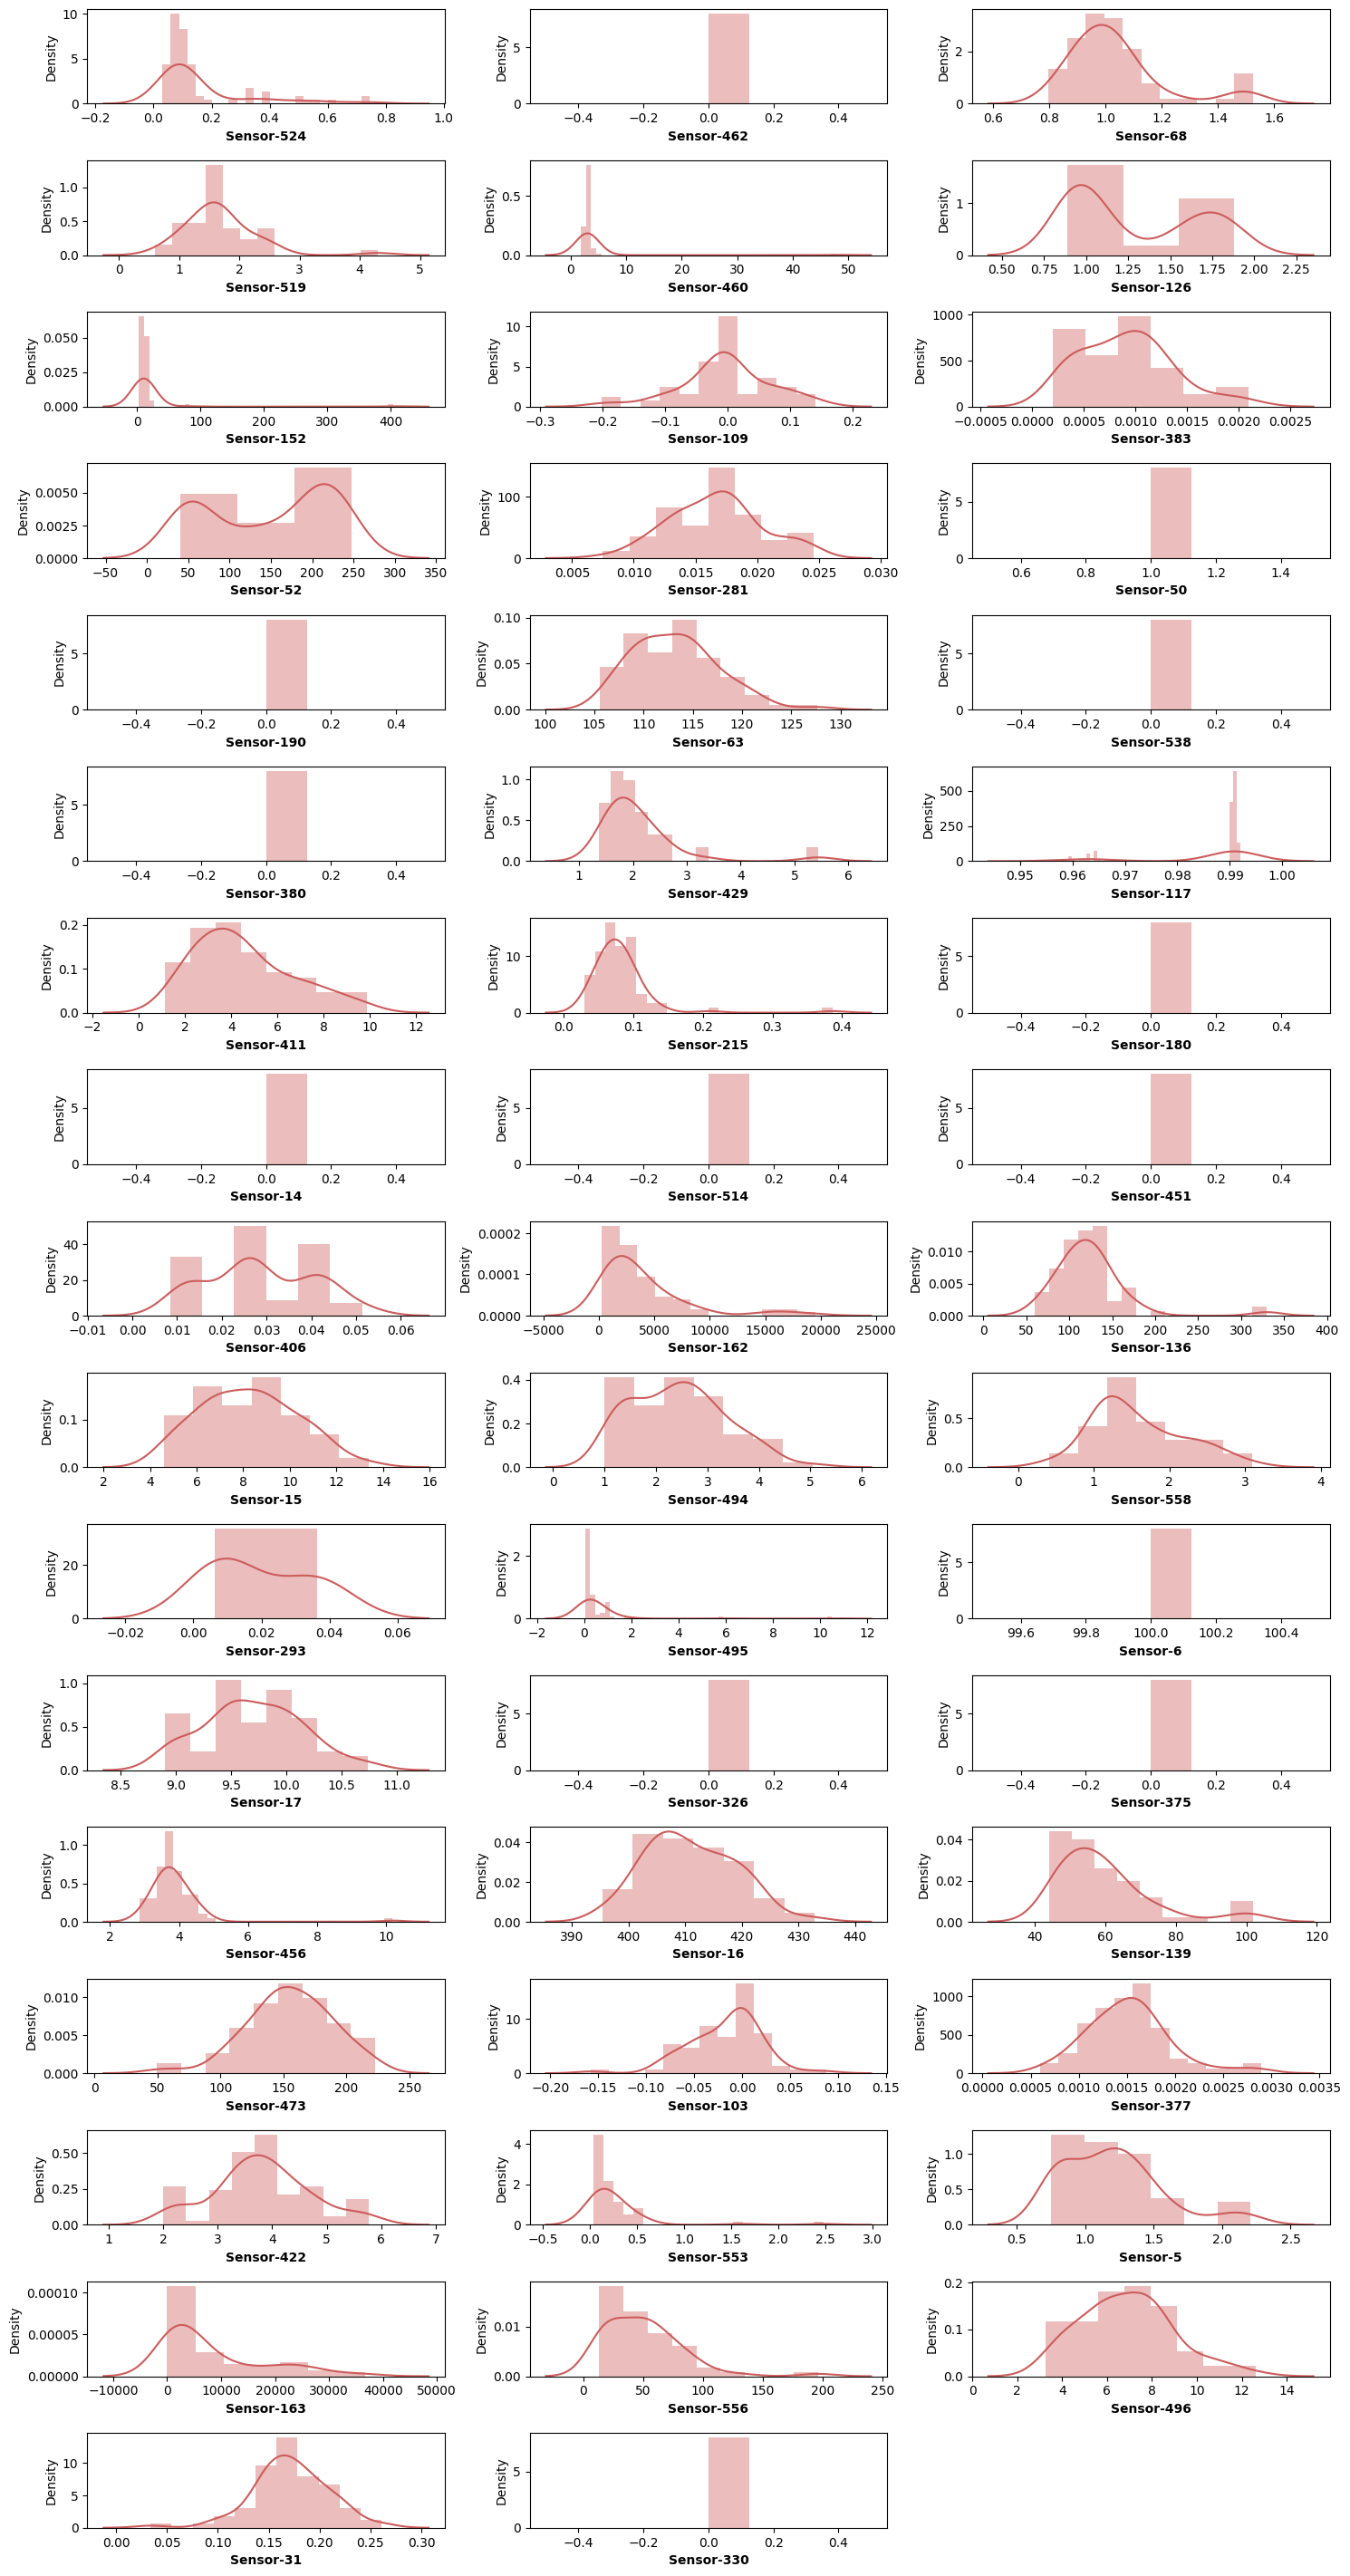

In [12]:
# let's not have a look at the distribution of random 50 cols

plt.figure(figsize=(15, 100))

for i, col in enumerate(wafers.columns[random_50_sensors_idx]):
    plt.subplot(60, 3, i+1)
    sns.distplot(x=wafers[col], color='indianred')
    plt.xlabel(col, weight='bold')
    plt.tight_layout()


### Get columns to drop:
Will drop columns with zero standard deviation as they are not influencing the target variable in any way

In [13]:
def get_cols_with_zero_std_dev(df: pd.DataFrame):
    """
    Returns a list of column names who are having zero standard deviation
    """
    cols_to_drop = []
    num_cols = [col for col in df.columns if df[col].dtype != "0"]
    for col in num_cols:
        if df[col].std() == 0:
            cols_to_drop.append(col)

    return cols_to_drop


def get_redundant_cols(df: pd.DataFrame, threshold=0.7):
    """
    Returns a list of values having missing values more than certain threshold
    """
    cols_missing_ratios = df.isna().sum().div(df.shape[0])
    cols_to_drop = list(cols_missing_ratios[cols_missing_ratios > threshold].index)
    return cols_to_drop

In [14]:
# Columns with missing values more than 70%

cols_to_drop_1 = get_redundant_cols(wafers, threshold=0.7)
cols_to_drop_1

['Sensor-158', 'Sensor-159', 'Sensor-293', 'Sensor-294']

In [15]:
wafers.drop(['Unnamed: 0'], axis=1, inplace=True)

In [16]:
# Columns with 0 standard deviation

cols_to_drop_2 = get_cols_with_zero_std_dev(df=wafers)
# cols_to_drop_2.append("Wafer")
cols_to_drop_2 

['Sensor-6',
 'Sensor-14',
 'Sensor-43',
 'Sensor-50',
 'Sensor-53',
 'Sensor-70',
 'Sensor-75',
 'Sensor-98',
 'Sensor-142',
 'Sensor-150',
 'Sensor-179',
 'Sensor-180',
 'Sensor-187',
 'Sensor-190',
 'Sensor-191',
 'Sensor-192',
 'Sensor-193',
 'Sensor-194',
 'Sensor-195',
 'Sensor-207',
 'Sensor-210',
 'Sensor-227',
 'Sensor-230',
 'Sensor-231',
 'Sensor-232',
 'Sensor-233',
 'Sensor-234',
 'Sensor-235',
 'Sensor-236',
 'Sensor-237',
 'Sensor-238',
 'Sensor-241',
 'Sensor-242',
 'Sensor-243',
 'Sensor-244',
 'Sensor-257',
 'Sensor-258',
 'Sensor-259',
 'Sensor-260',
 'Sensor-261',
 'Sensor-262',
 'Sensor-263',
 'Sensor-264',
 'Sensor-265',
 'Sensor-266',
 'Sensor-267',
 'Sensor-277',
 'Sensor-285',
 'Sensor-314',
 'Sensor-315',
 'Sensor-316',
 'Sensor-323',
 'Sensor-326',
 'Sensor-327',
 'Sensor-328',
 'Sensor-329',
 'Sensor-330',
 'Sensor-331',
 'Sensor-343',
 'Sensor-348',
 'Sensor-365',
 'Sensor-370',
 'Sensor-371',
 'Sensor-372',
 'Sensor-373',
 'Sensor-374',
 'Sensor-375',
 'Se

In [17]:
# Cols to drop

cols_to_drop = cols_to_drop_1 + cols_to_drop_2

### Seperate Features and Labels out

In [18]:
X, y = wafers.drop(cols_to_drop, axis=1), wafers[['Good/Bad']]

In [19]:
# Dependent Feature variables
print(f"Shape of dependent variables: {X.shape}")
X.head()

Shape of dependent variables: (80, 465)


,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-7,Sensor-8,Sensor-9,Sensor-10,Sensor-11,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
55,NaN,2532.45,2191.1333,2197.6570,1.1569,89.7222,0.1251,1.5762,0.0028,-0.0066,...,NaN,0.4936,0.0113,0.0033,2.2874,0.0133,0.0139,0.0038,104.3034,-1
88,3221.21,2391.20,2189.9667,1046.6212,0.8662,102.3622,0.1208,1.4756,-0.0025,0.0025,...,NaN,0.4940,0.0123,0.0033,2.4860,0.0280,0.0078,0.0022,27.7601,-1
26,2951.85,2525.00,2189.5777,1320.3197,1.3459,100.7744,0.1234,1.5590,-0.0032,0.0135,...,53.8577,0.5025,0.0178,0.0045,3.5361,0.0286,0.0154,0.0056,53.8577,-1
42,2982.07,2447.06,2199.6334,1242.8420,1.4083,99.2178,0.1221,1.4542,0.0142,-0.0064,...,NaN,0.4993,0.0151,0.0038,3.0214,0.0117,0.0262,0.0089,223.1018,-1
69,3058.08,2524.60,2192.3778,1110.5453,0.8147,99.2922,0.1226,1.4958,0.0004,0.0037,...,24.6547,0.4974,0.0171,0.0040,3.4352,0.0218,0.0054,0.0020,24.6547,-1


In [20]:
print(f"Shape of independent variables: {y.shape}")
y.head()

Shape of independent variables: (80, 1)


,Good/Bad
55,-1
88,-1
26,-1
42,-1
69,-1


## Data Transformation

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import RobustScaler

imputer = KNNImputer(n_neighbors=3)
preprocessing_pipeline = Pipeline(steps=[('Imputer', imputer), ('Scaler', RobustScaler())])

preprocessing_pipeline

Pipeline(steps=[('Imputer', KNNImputer(n_neighbors=3)),
                ('Scaler', RobustScaler())])

In [22]:
# Transform "Wafers" features

X_trans = preprocessing_pipeline.fit_transform(X)
print(f"Shape of tranformed features set: {X.shape}")

Shape of tranformed features set: (80, 465)


In [23]:
pd.DataFrame(X_trans)

,0,1,2,3,4,5,6,7,8,9,...,455,456,457,458,459,460,461,462,463,464
0,-0.027812,0.373952,-0.428921,1.022738,-0.014076,-1.375714,1.168317,1.400958,0.088136,-0.887781,...,-0.914150,-1.292818,-0.478261,-0.121212,-0.417537,-0.596491,0.085106,0.000000,0.759556,0.0
1,2.504310,-1.386446,-0.479865,-0.310192,-0.570786,0.476912,-0.534653,0.267117,-0.271186,0.019950,...,-0.198765,-1.204420,-0.188406,-0.121212,-0.131350,0.435088,-0.563830,-0.516129,-0.526109,0.0
2,-0.602047,0.281103,-0.496852,0.006758,0.347872,0.244190,0.495050,1.207101,-0.318644,1.117207,...,-0.068827,0.674033,1.405797,1.333333,1.381872,0.477193,0.244681,0.580645,-0.087759,0.0
3,-0.253539,-0.690263,-0.057738,-0.082963,0.467372,0.016042,-0.019802,0.025923,0.861017,-0.867830,...,-0.492923,-0.033149,0.623188,0.484848,0.640176,-0.708772,1.393617,1.645161,2.754960,0.0
4,0.623036,0.276118,-0.374576,-0.236166,-0.669412,0.026947,0.178218,0.494787,-0.074576,0.139651,...,-1.195685,-0.453039,1.202899,0.727273,1.236472,0.000000,-0.819149,-0.580645,-0.578269,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,0.772611,1.741143,0.001454,-0.301040,0.418921,0.157070,-0.811881,0.014652,0.230508,-0.708229,...,0.766773,-0.475138,0.275362,0.606061,0.299661,-0.673684,0.000000,0.032258,0.813679,0.0
76,0.451204,0.536968,-0.374576,-0.236166,-0.669412,0.026947,0.178218,-0.783319,-0.108475,-0.728180,...,-0.180775,-0.121547,0.043478,0.242424,0.069385,0.000000,-0.819149,-0.580645,-0.578269,0.0
77,-0.032233,0.217791,1.035904,-0.006758,0.433667,0.296794,-0.534653,0.735982,-1.016949,0.468828,...,-0.276267,-0.784530,0.362319,0.363636,0.408891,0.421053,0.042553,0.129032,-0.178055,0.0
78,0.033963,0.874591,0.535175,0.875736,1.544023,-1.666080,0.415842,-0.082277,-0.440678,-0.299252,...,0.630942,-0.165746,1.231884,0.848485,1.245839,-0.161404,0.191489,0.290323,0.284215,0.0


## Shall we cluster "Wafers" instances?

In [24]:
%pip install kneed --quiet

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at e:\codebase\machine learning\ml-projects\wafer-fault-classification\.venv\lib\site-packages\src-0.0.1-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [30]:
from sklearn.cluster import KMeans
from kneed import KneeLocator
from typing import Tuple
from dataclasses import dataclass


@dataclass
class ClusterDataInstances:
    """Divides the given data instances into different clusters via KMeans Clustering algorithm.

    Args:
        X (np.array): Takes in an array which gotta be clustered.
        desc (str): Description of the said array.
    """

    X: np.array
    desc: str

    def _get_ideal_no_of_clusters(self):
        """
        Returns the ideal number of clusters the given data instances should be divided into by
        locating the dispersal point in number of clusters vs WCSS plot.

        Raises:
            e: Raises relevant exception should any kinda error pops up while determining the ideal
            number of clusters.

        Returns:
            int: Ideal number of clusters the given data instances should be divided into.
        """
        try:
            print(
                f'Getting the ideal number of clusters to cluster "{self.desc} set" into..'
            )

            # computer WCSS for shortlisted no. of clusters
            print("Computing WCSS for shortlisted no. of clusters......")
            wcss = []  # within clusters summation of squares

            for i in range(1, 11):
                kmeans = KMeans(n_clusters=i, init="k-means++", random_state=42)
                kmeans.fit(self.X)
                wcss.append(kmeans.inertia_)
                print(f"WCSS for n_cluster={i}: {kmeans.inertia_}")

            print("WCSS computed successfully for all shortlisted number of clusters!")

            # Finalize dispersal point as the ideal number of clusters
            knee_finder = KneeLocator(
                range(1, 11), wcss, curve="convex", direction="decreasing"
            )

            print(f"Ideal no. of clusters to be formed: {knee_finder.knee}")

            return knee_finder.knee

        except Exception as e:
            print(e)
            return e

    def create_clusters(self) -> Tuple:
        """Divides the given data instances into the different clusters, they first hand shoud've been divided into via offcourse Kmeans Clustering algorithm.

        Raises:
            e: Raises relevant exception should any kinda error pops up while dividing the given data instances into
            clusters.

        Returns:
            (KMeans, np.array): KMeans Clustering object being used to cluster the given data instances and the given dataset
            along with the cluster labels, respectively.
        """

        try:
            ideal_clusters = self._get_ideal_no_of_clusters()

            print(
                f'Dividing the "{self.desc}" instances into {ideal_clusters} clusters via KMeans Clustering algorithm..'
            )

            kmeans = KMeans(
                n_clusters=ideal_clusters, init="k-means++", random_state=42
            )

            y_kmeans = kmeans.fit_predict(self.X)

            print(
                f"..said data instances divided into {ideal_clusters} clusters successfully!"
            )

            return kmeans, np.c_[self.X, y_kmeans]
        except Exception as e:
            print(e)
            return e

In [31]:
# Cluster "Wafer" instances

cluster_wafers = ClusterDataInstances(X=X_trans, desc="wafers features")
clusterer, X_clus = cluster_wafers.create_clusters()
X_clus

Getting the ideal number of clusters to cluster "wafers features set" into..
Computing WCSS for shortlisted no. of clusters......


WCSS for n_cluster=1: 7157148.928067336
WCSS for n_cluster=2: 2060306.1634277874
WCSS for n_cluster=3: 1075227.480090585
WCSS for n_cluster=4: 530517.1820611968
WCSS for n_cluster=5: 485669.81620624167
WCSS for n_cluster=6: 437364.96477712144
WCSS for n_cluster=7: 226364.96063604523
WCSS for n_cluster=8: 190022.6930221619
WCSS for n_cluster=9: 147066.91124266043
WCSS for n_cluster=10: 108703.08733901891
WCSS computed successfully for all shortlisted number of clusters!
Ideal no. of clusters to be formed: 3
Dividing the "wafers features" instances into 3 clusters via KMeans Clustering algorithm..
..said data instances divided into 3 clusters successfully!


array([[-0.02781221,  0.37395233, -0.4289214 , ...,  0.75955556,
         0.        ,  1.        ],
       [ 2.50431022, -1.38644649, -0.47986463, ..., -0.52610857,
         0.        ,  1.        ],
       [-0.60204699,  0.28110298, -0.49685153, ..., -0.08775867,
         0.        ,  1.        ],
       ...,
       [-0.03223295,  0.21779093,  1.03590393, ..., -0.17805529,
         0.        ,  0.        ],
       [ 0.03396281,  0.87459106,  0.53517467, ...,  0.28421459,
         0.        ,  1.        ],
       [ 0.86164048,  0.3813055 , -0.59146288, ..., -0.20782888,
         0.        ,  1.        ]])

In [33]:
# Clusters 
np.unique(X_clus[:, -1])

array([0., 1., 2.])

=> So the dataset was divided into 3 optimal clusters.

In [34]:
## Configure "Clustered" array along with target features
wafers_clus = np.c_[X_clus, y]

# Cluster_1 data
wafers_1 = wafers_clus[wafers_clus[:, -2] == 0]
wafers_1.shape

(17, 467)

In [35]:
## Cluster_2 data

wafers_clus[wafers_clus[:, -2] == 1].shape

(62, 467)

In [36]:
## Cluster_3 data

wafers_clus[wafers_clus[:, -2] == 2].shape

(1, 467)

=> Thus we mustn't divide the dataset into clusters. Not a good idea!



## Resampling of Training instances

In [37]:
%pip install imbalanced-learn --quiet

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at e:\codebase\machine learning\ml-projects\wafer-fault-classification\.venv\lib\site-packages\src-0.0.1-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [39]:
from imblearn.combine import SMOTETomek

X, y = X_trans[:, :-1], y
resampler = SMOTETomek(sampling_strategy='auto')
X_res, y_res = resampler.fit_resample(X, y)


In [40]:
print("Before resampling, Shape of training instances: ", np.c_[X, y].shape)
print("After resampling, Shape of training instances: ", np.c_[X_res, y_res].shape)

Before resampling, Shape of training instances:  (80, 465)
After resampling, Shape of training instances:  (148, 465)


In [41]:
## Target Cats after Resampling

print(np.unique(y_res))
print(f"Value Counts: \n-1: {len(y_res[y_res == -1])}, 1: {len(y_res[y_res == 1])}")

[-1  1]
Value Counts: 
-1: 148, 1: 148


## Prepare the test set

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=1/3, random_state=42)

print(f"train set: {X_train.shape, y_train.shape}")
print(f"test set: {X_test.shape, y_test.shape}")

train set: ((98, 464), (98, 1))
test set: ((50, 464), (50, 1))


In [43]:
# Prepared training and test sets

X_prep = X_train
y_prep = y_train
X_test_prep = X_test
y_test_prep = y_test

print(X_prep.shape, y_prep.shape)
print(X_test_prep.shape, y_test_prep.shape)

(98, 464) (98, 1)
(50, 464) (50, 1)


In [51]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_auc_score

# Shortlisted base Models
svc_clf = SVC(kernel='linear')
svc_rbf_clf = SVC(kernel='rbf')
random_clf = RandomForestClassifier(random_state=42)
xgb_clf = XGBClassifier(objective='binary:logistic')

In [56]:
# A function to display scores

def display_scores(scores):
    print(f"Scores: {scores}")
    print(f"Mean: {scores.mean()}")
    print(f"Standard Deviation: {scores.std()}")

## Evaluating SVC (kernel='linear') using cross-validation:


In [57]:
svc_scores = cross_val_score(svc_clf, X_prep, y_prep, scoring='roc_auc', cv=10, verbose=2)

[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s


[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s


In [58]:
display_scores(svc_scores)

Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean: 1.0
Standard Deviation: 0.0


In [59]:
## Performance on test set using cross-validation

# Predictions using cross-validation
svc_preds = cross_val_predict(svc_clf, X_test_prep, y_test_prep, cv=5)

# AUC score
svc_auc = roc_auc_score(y_test_prep, svc_preds)
svc_auc

np.float64(0.94)

## Evaluating SVC (kernel='rbf') using cross-validation:


In [60]:
## SVC rbf Scores

svc_rbf_scores = cross_val_score(svc_rbf_clf, X_prep, y_prep, scoring='roc_auc', cv=10, verbose=2)

[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s


In [61]:
display_scores(svc_rbf_scores)


Scores: [1.   0.96 1.   1.   1.   0.96 1.   1.   1.   1.  ]
Mean: 0.992
Standard Deviation: 0.01599999999999997


In [62]:
## Performance on test set using cross-validation

# Predictions using cross-validation
svc_rbf_preds = cross_val_predict(svc_rbf_clf, X_test_prep, y_test_prep, cv=5)

# AUC score
svc_rbf_auc = roc_auc_score(y_test_prep, svc_rbf_preds)
svc_rbf_auc

np.float64(0.6799999999999999)

## Evaluating RandomForestClassifier using cross-validation:

In [63]:
## Random Forest Scores

random_clf_scores = cross_val_score(random_clf, X_prep, y_prep, scoring='roc_auc', cv=10, verbose=2)

[CV] END .................................................... total time=   2.5s
[CV] END .................................................... total time=   0.9s
[CV] END .................................................... total time=   1.2s
[CV] END .................................................... total time=   2.6s
[CV] END .................................................... total time=   0.8s
[CV] END .................................................... total time=   0.6s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.4s
[CV] END .................................................... total time=   0.8s
[CV] END .................................................... total time=   0.4s


In [64]:
display_scores(random_clf_scores)


Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean: 1.0
Standard Deviation: 0.0


In [65]:
## Performance on test set using cross-validation

# Predictions using cross-validation
random_clf_preds = cross_val_predict(random_clf, X_test_prep, y_test_prep, cv=5)

# AUC score
random_clf_auc = roc_auc_score(y_test_prep, random_clf_preds)
random_clf_auc

np.float64(1.0)